## Problem Set 1:  DSGE models
#### Thomas Pellet

### Exercise 5

In [20]:
import numpy as np
from scipy import optimize


def system(X,*params):
    K,C,W,T,R = X
    α,β,γ,τ,δ,Z = params
    return [C - (1-τ)*(W + (R - δ)*K) - T, \
    1 - β*((R-δ)*(1-τ)+1), \
    R - α*K**(α-1)*np.exp(Z*(1-α)), \
    W - (1-α)*K**α*np.exp(Z*(1-α)),\
    T - τ*(W + (R-δ)*K)]

params = 0.4,0.98,2.5,0.05,0.10,0.0
α,β,γ,τ,δ,Z = params
print((1-β)/(β*(1-τ)) + δ)

def solution(params):
    X0 = [1,1,1,1,1]                     
    solve = optimize.root(system,X0,method='hybr',args=(params))
    K,C,W,T,R = solve.x
    print(K,C,W,T,R)
   
solution(params)

0.1214822771213749
7.287497950683171 1.4845048188489616 1.327952768350645 0.07422524094244808 0.12148227712137485



### Exercise 6

In [4]:
import numpy as np
from scipy import optimize


def system(X,*params):
    K,C,W,R,L = X
    α,β,γ,τ,δ,a,ξ = params
#     print(a/(1-L)**(ξ))
    return [C - (W*L + (R - δ)*K), \
    1 - β*((R-δ)*(1-τ)+1), \
    a*(1-L)**(-ξ) - W*(1-τ)*C**(-γ), \
    R - α*K**(α-1)*L**(1-α), \
    W - (1-α)*K**α*L**(-α)]

params = 0.4,0.98,2.5,0.05,0.10,0.5,1.5
α,β,γ,τ,δ,a,ξ = params
print((1-β)/(β*(1-τ)) + δ)

def solution(params):
    X0 = [0.5,0.5,0.5,0.5,0.5]                     
    solve = optimize.root(system,X0,method='hybr',args=(params))
    K,C,W,R,L= solve.x
    print(K,C,W,R,L)
solution(params)


0.1214822771213749
4.225229024018969 0.8607032061385491 1.3279527679010208 0.12148227712137502 0.5797914532707138


### Exercise 7

In [61]:
from scipy import optimize
from autograd import jacobian
import numpy as np
from autograd import numpy as anp

params = 0.4,0.98,2.5,0.10,1.5,0.05,0.5,0.0
α,β,γ,δ,ξ,τ,a,Z = params

def system(X,*params):
    K,C,W,R,L,T = X
    α,β,γ,δ,ξ,τ,a,Z = params

    return [C - (1-τ)*(W*L + (R - δ)*K) - T, \
    1 - β*((R-δ)*(1-τ)+1), \
    a*(1-L)**(-ξ) - W*(1-τ)*C**(-γ), \
    R - α*K**(α-1)*anp.exp(Z*(1-α))*L**(1-α), \
    W - (1-α)*K**α*anp.exp(Z*(1-α))*L**(-α), \
    T - τ*(W*L + (R-δ)*K)]

def solution(params):
    solve = optimize.root(system,X0,method='hybr',args=(params))
    K,C,W,R,L,T = solve.x
    return  np.array([K,C,W,R,L,T])

X0 = [0.5,0.5,0.5,0.5,0.5,0.5]
params = α,β,γ,δ,ξ,τ,a,Z

K,C,W,R,L,T = solution(params)
print(K,C,W,R,L,T)

h = 0.0001
def differentiate(params,h):
    matrix = np.empty([6,len(params)])
    ss = solution(params)
    matrix = np.array([ss,]*len(params)).transpose()
    matrixh = np.empty_like(matrix)
    for i in range(len(params)):
        paramsh = np.array([params])
        paramsh[0,i] += h
        α,β,γ,δ,ξ,τ,a,Z = (paramsh[0,:])
        P = α,β,γ,δ,ξ,τ,a,Z
        matrixh[:,i] = solution(P)

    jacobian = (matrixh - matrix)/h
    return jacobian

# Call function
h = 0.001
jacobian = differentiate(params,h)
solutions = np.round(jacobian,4)
print("Parameters \t α \t β \t γ \t δ \t ξ \t τ \t a \t Z \n", 
      "K \t", solutions[0,:], "\n",
      "C \t", solutions[1,:], "\n",
      "W \t", solutions[2,:], "\n",
      "R \t", solutions[3,:], "\n",
      "L \t", solutions[4,:], "\n",
      "T \t", solutions[5,:], "\n")



4.225229024235122 0.8607032061856069 1.32795276781949 0.12148227712137488 0.5797914533199656 0.04303516030928035
Parameters 	 α 	 β 	 γ 	 δ 	 ξ 	 τ 	 a 	 Z 
 K 	 [ 26.0778  66.2433   0.1387 -47.8974  -0.8014  -2.3245  -1.8474   2.839 ] 
 C 	 [ 2.0924  1.7471  0.0282 -3.491  -0.1633 -0.2345 -0.3763  0.5783] 
 W 	 [ 4.4152  8.0396 -0.     -7.2379  0.     -0.1649  0.      1.3286] 
 R 	 [-0.     -1.0949  0.      1.     -0.      0.0226  0.      0.    ] 
 L 	 [-0.7713  0.2706  0.019   1.3133 -0.11   -0.139  -0.2535 -0.1903] 
 T 	 [ 0.1046  0.0874  0.0014 -0.1745 -0.0082  0.8487 -0.0188  0.0289] 



## Part 2 - Solving DSGE models with linearization methods

#### Exercise 2: Brock and Mirman using Uhlig's notation and log K

-0.5376528147339814


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


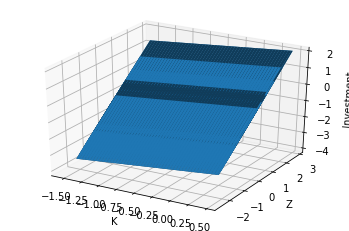

In [84]:
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

α,β,N = 0.4,0.98,0.9

# Uhlig notation for derivatives of Gamma function
def F(α,Kpp,Kp,Zp):
    return np.exp(Zp)/(np.exp(Zp + α*Kp) - np.exp(Kpp))

def G(α,Kpp,Kp,K,Zp,Z):
    term1 = (α-1)*np.exp(Zp + (α-1)*Kp + Z + α*K) - α*np.exp(Zp + α*Kp) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))
    term2 =  α*np.exp(Zp + α*Kp) \
            / (np.exp(Zp + α*Kp) - np.exp(Kpp))
    return term1 - term2

def H(α,Kpp,Kp,K,Zp,Z):
    return α*np.exp(Zp + (α-1)*Kp + Z + α*K) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))

def L(α,Kpp,Kp,Zp):
    return 1 - np.exp(Zp + α*Kp) \
            / (np.exp(Zp + α*Kp) - np.exp(Kpp))

def M(α,Kpp,Kp,K,Zp,Z):
    return np.exp(Zp + (α-1)*Kp + Z + α*K) \
            / (np.exp(Zp + (α-1)*Kp + Z + α*K) - np.exp(Zp + α*Kp))

def P(α,Kpp,Kp,K,Zp,Z,G,F,H):
    num = - G(α,Kpp,Kp,K,Zp,Z) + (G(α,Kpp,Kp,K,Zp,Z)**2 - \
        4*F(α,Kpp,Kp,Zp)*H(α,Kpp,Kp,K,Zp,Z))**0.5
    den = 2*F(α,Kpp,Kp,Zp)
    return num/den

def Q(α,Kpp,Kp,K,Zp,Z,G,F,H):
    num = -(L(α,Kpp,Kp,Zp)*N + M(α,Kpp,Kp,K,Zp,Z))
    den = F(α,Kpp,Kp,Zp)*N + F(α,Kpp,Kp,Zp)*P(α,Kpp,Kp,K,Zp,Z,G,F,H) \
    + G(α,Kpp,Kp,K,Zp,Z) 
    return num/den

# def Φ(α,Kpp,Kp,K,Zp,Z,G,F,H,Kss):
#     return Kss + P(α,Kpp,Kp,K,Zp,Z,G,F,H)*(K - Kss) + Q(α,Kpp,Kp,K,Zp,Z,G,F,H)*Z

def Φ(K,Kss,Z,G,F,H,Q):
    Zss = 0
    return Kss + P(α,Kss,Kss,Kss,Zss,Zss,G,F,H)*(K - Kss) + Q(α,Kss,Kss,Kss,Zss,Zss,G,F,H)*Z


Kss = (1/α*β)**(α-1)
kss = np.log(Kss)
print(kss)

def truepol(K,Z):
    return np.log(α*β) + α*K + Z

np.random.seed(seed=25)
n = 100
# Build grid
zgrid = np.random.normal(loc=0,scale =1,size=n)
kgrid = np.linspace(kss-1,kss+1,n)

# Evaluate 3D function

X,Y = np.meshgrid(kgrid, zgrid)
Vals = np.empty_like(X)
trueVals = Vals
for i,item in enumerate(X):
    Vals[i] = Φ(item,kss,Y[i],G,F,H,Q)
    trueVals[i] = truepol(item,Y[i])

# Plot true policy function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, trueVals)
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('Investment')
plt.show()


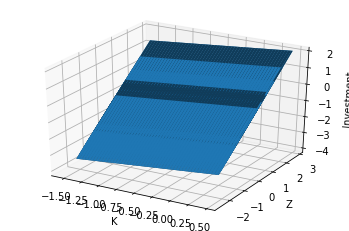

In [87]:
# Estimated policy function with perturbation method
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Vals)
ax.set_xlabel('K')
ax.set_ylabel('Z')
ax.set_zlabel('Investment')
plt.show()